Aquí lo que hicimos fue generar un nuevo Dataset a partir de nuevas coordenadas cambiando Latitud Longitud y Altura por X Y y Z
Es decir por coordenadas Cartesianas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Utils import geo_conversions as gc

In [2]:
df = pd.read_excel("NuevoExcelCompleto_para_ver.xlsx")

In [3]:
lat_columns = [f'lat_{i}' for i in range(1,101)]
lon_columns = [f'long_{i}' for i in range(1,101)]
height_columns = [f'elev_{i}' for i in range(1,101)]

In [4]:
df_lat = df[lat_columns]
df_lon = df[lon_columns]
df_heights = df[height_columns]

lat = df_lat.to_numpy()
lon = df_lon.to_numpy()
heights = df_heights.to_numpy()

In [5]:
X1_lat = lat[100]
Y1_lon = lon[100]
Z1_h = heights[100]/1000
print(f'Ingresa => Latitud :{X1_lat[1]}, Longitud:{Y1_lon[1]}, Altura:{Z1_h[1]}')
x1,y1,z1 = gc.transform_coords_cartesian(X1_lat,Y1_lon,Z1_h)
print(f'Transf coord Cartesiana x1:{x1[1]}, y1:{y1[1]}, z:{z1[1]}')
phi_n, theta_n, rho_n = gc.transform_cartesian_to_spherical(x1,y1,z1)
print(f'phi_1: {phi_n[1]},  theta_1: {theta_n[1]}, rho_1: {rho_n[1]}[m] ')
print(f'lat_1: {np.degrees(phi_n[1])},  long_1: {np.degrees(theta_n[1])}, en radianes rho_1: {rho_n[1]} [m]')



Ingresa => Latitud :-42.28266974107886, Longitud:-63.37433196229574, Altura:0.1866418087121212
Transf coord Cartesiana x1:-0.7848185428768487, y1:0.7136961151506414, z:0.5318049380732719
phi_1: -0.7379718035152043,  theta_1: -1.1060907539939395, rho_1: 1.186641808712121[m] 
lat_1: -42.282669741078855,  long_1: -63.37433196229574, en radianes rho_1: 1.186641808712121 [m]


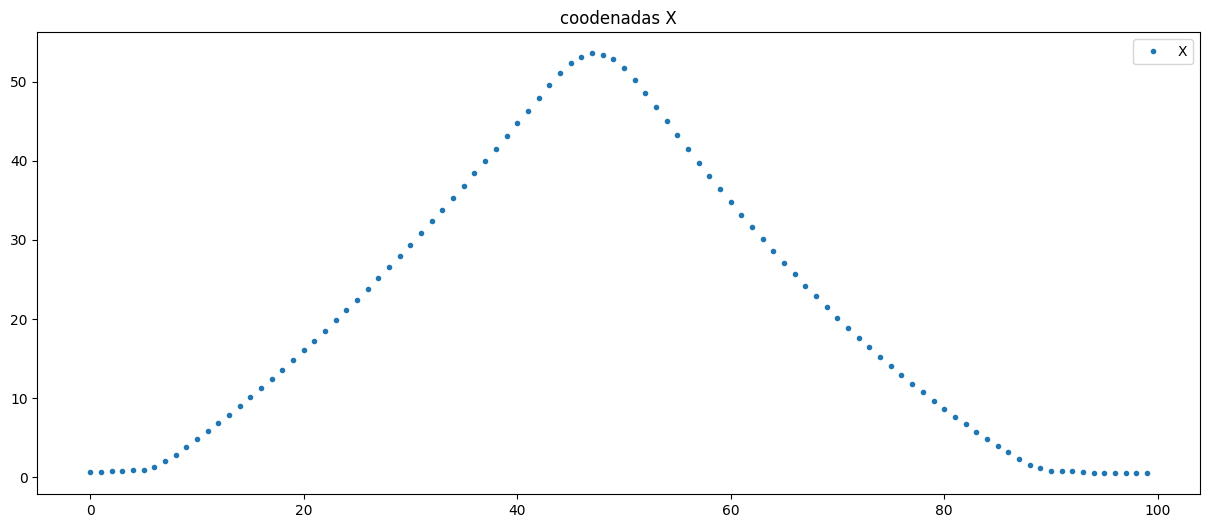

In [6]:
#graficar
# Graf. Alturas
plt.figure(figsize=(15,6))
plt.plot(y1, label = "X",linestyle= 'None', marker = '.')
plt.title("coodenadas X")
plt.legend()
plt.show()

In [7]:
df['fc'] = df['fc']/1E6
df = df.rename(columns = {'fc': 'fc [Mhz]'})
X_columns = [
    'latitude_pos_tx', 'longitude_pos_tx', 'elevation_pos_tx', 'fc [Mhz]', 'elevation', 
    'azimuth', 'year', 'mmdd', 'UTI', 'hour', 'delay', 'terrestrial_range', 'slant_range'
]
df_x = df[X_columns]

x,y,z = zip(*(map(lambda args: np.array(gc.transform_coords_cartesian(*args)), zip(lat, lon, heights/1000))))
# divido la altura en 1000 para que esten en km ya que estan en m

# genero el dataset para agregar 
x_columns = [f'x_{i}' for i in range(1,101)]
y_columns = [f'y_{i}' for i in range(1,101)]
z_columns = [f'z_{i}' for i in range(1,101)]
x_df = pd.DataFrame(x,columns= x_columns)
y_df = pd.DataFrame(y,columns = y_columns)
z_df = pd.DataFrame(z,columns = z_columns)
coord_df = pd.concat([df_x,x_df,y_df,z_df], axis = 1)

coord_df.head()

,latitude_pos_tx,longitude_pos_tx,elevation_pos_tx,fc [Mhz],elevation,azimuth,year,mmdd,UTI,hour,...,z_91,z_92,z_93,z_94,z_95,z_96,z_97,z_98,z_99,z_100
0,-42.28,-63.4,0,10.0,5,98,2010,101,0,0,...,13.550145,9.744914,6.025632,2.905997,1.384384,1.270951,0.900947,0.851983,0.850403,0.848459
1,-42.28,-63.4,0,10.0,5,98,2010,101,0,4,...,9.496748,6.825483,4.277719,1.855211,1.310479,1.283431,1.015714,0.912601,0.891876,0.873631
2,-42.28,-63.4,0,10.0,5,98,2010,101,0,8,...,2.171107,1.518635,1.267409,1.268296,1.176972,1.048163,0.883362,0.709809,0.692949,0.692772
3,-42.28,-63.4,0,10.0,5,98,2010,101,0,12,...,0.724955,0.725855,0.727602,0.730295,0.731362,0.731362,0.723035,0.711719,0.700401,0.689083
4,-42.28,-63.4,0,10.0,5,98,2010,101,0,16,...,1.119523,1.120444,1.076734,0.943677,0.827124,0.727118,0.693521,0.693153,0.692785,0.692417


In [8]:
z_columns = [f'z_{i}' for i in range(1,101)]
type(z_columns)
print(x_columns)

['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'x_79', 'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86', 'x_87', 'x_88', 'x_89', 'x_90', 'x_91', 'x_92', 'x_93', 'x_94', 'x_95', 'x_96', 'x_97', 'x_98', 'x_99', 'x_100']


In [9]:
# Aquí la se realiza el guardado del nuevo dataset 
# coord_df.to_excel('dataset/dataset-with-coord-cartesian.xlsx', index = False)